In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Dropout,GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("imdb.csv",encoding="latin1")

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [7]:
texts = df["review"].values
labels = LabelEncoder().fit_transform(df["sentiment"].values)

In [8]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences,maxlen=200)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(padded,labels,test_size=0.2,random_state=42)

In [10]:
model = Sequential([
    Embedding(input_dim=10000,output_dim=16,input_length=200),
    GlobalAveragePooling1D(),
    Dense(16,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
__________________________________________________

In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience = 2,restore_best_weights= True)
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[early_stop],epochs=20,batch_size=32)

Epoch 1/20
1250/1250 [==============================] - 8s 5ms/step - loss: 0.4884 - Accuracy: 0.7800 - val_loss: 0.3017 - val_Accuracy: 0.8822
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.2986 - Accuracy: 0.8851 - val_loss: 0.2657 - val_Accuracy: 0.8917
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2578 - Accuracy: 0.9054 - val_loss: 0.2628 - val_Accuracy: 0.8923
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2343 - Accuracy: 0.9176 - val_loss: 0.2632 - val_Accuracy: 0.8906
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2152 - Accuracy: 0.9275 - val_loss: 0.2729 - val_Accuracy: 0.8900


In [22]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2628 - Accuracy: 0.8923


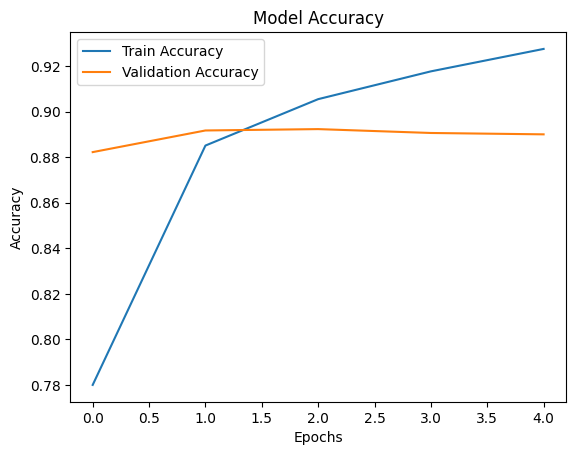

In [24]:
plt.plot(history.history['Accuracy'],label = 'Train Accuracy')
plt.plot(history.history['val_Accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

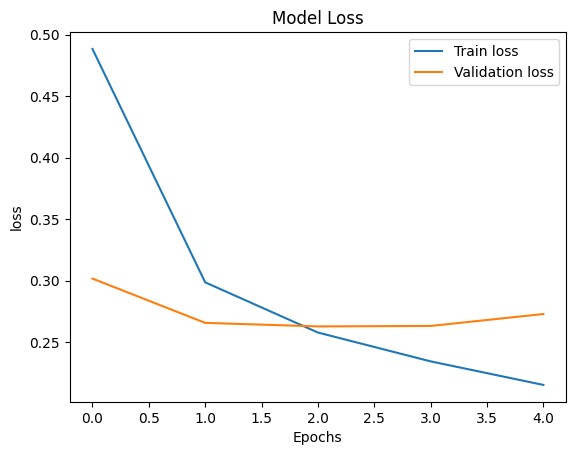

In [25]:
plt.plot(history.history['loss'],label = 'Train loss')
plt.plot(history.history['val_loss'],label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Model Loss")
plt.show()